## Linear Regression in Tensorflow

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

c:\users\dell\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dell\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dell\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dell\anaconda3\envs\tensorflow1\lib\site-packages

In [13]:
# parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
# Traning data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

array([ 3.3  ,  4.4  ,  5.5  ,  6.71 ,  6.93 ,  4.168,  9.779,  6.182,
        7.59 ,  2.167,  7.042, 10.791,  5.313,  7.997,  5.654,  9.27 ,
        3.1  ])

In [7]:
# tf graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

In [8]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [9]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Initialize the variables (assign their default values)
init = tf.global_variables_initializer()

Epoch:50 cost=0.08318059146404266 W=0.29376375675201416 b=0.4837093651294708
Epoch:100 cost=0.08246254175901413 W=0.291136771440506 b=0.5026076436042786
Epoch:150 cost=0.0818275585770607 W=0.2886660397052765 b=0.5203820466995239
Epoch:200 cost=0.08126605302095413 W=0.2863421142101288 b=0.5370999574661255
Epoch:250 cost=0.08076956123113632 W=0.28415653109550476 b=0.5528231859207153
Epoch:300 cost=0.08033054322004318 W=0.2821008861064911 b=0.5676115155220032
Epoch:350 cost=0.07994236797094345 W=0.2801674008369446 b=0.5815207362174988
Epoch:400 cost=0.07959913462400436 W=0.2783489525318146 b=0.5946024060249329
Epoch:450 cost=0.07929568737745285 W=0.2766386568546295 b=0.6069066524505615
Epoch:500 cost=0.07902740687131882 W=0.2750299870967865 b=0.6184787154197693
Epoch:550 cost=0.07879023998975754 W=0.27351728081703186 b=0.629361093044281
Epoch:600 cost=0.0785805806517601 W=0.2720946669578552 b=0.6395956873893738
Epoch:650 cost=0.07839524745941162 W=0.2707566022872925 b=0.6492217779159546
E

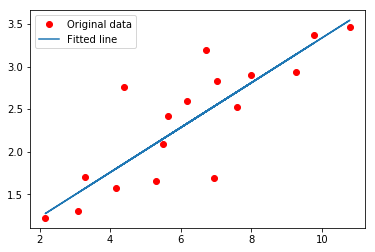

In [17]:
# Start traning 
with tf.Session() as sess:
    sess.run(init)
    
    # fit training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y: y})
            
        # Display logs per epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
            print("Epoch:{}".format(epoch+1), "cost={}".format(c), "W={}".format(sess.run(W)), "b={}".format(sess.run(b)))
            
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()